# Project 2: Fashion Class classification using Deep Learning (CNN)

## STEP 1): Problem Statement and Business case

The dataset consists of 70,000 images.

60,000 records will be used for training and 10,000 records will be used for testing. 
Dataset sample consists of 28x28  (784 pixels) grayscale image, associated with a label from 10 classes. 

Every image is stored in the form of a number between 0 (black) and 255 (white). 






## STEP 2): Importing data

In [3]:
# import necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random


In [4]:
#the following notebook was run on Google Colaboratory 
#Hence, the following lines of codes are needed (not needed for Anaconda)
from google.colab import drive       
drive.mount('/content/drive')
import os 
os.chdir("./drive/MyDrive/Udemy ML/Project 2")

Mounted at /content/drive


In [5]:
# dataframes creation for both training and testing datasets 
fashion_train_df = pd.read_csv('./fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('./fashion-mnist_test.csv', sep = ',')

In [6]:
#exploring the training dataset
# 784: 28x28 pixels 
# 1 coloumn for the label
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
#exploring the testing dataset
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [9]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,37,93,72,58,55,63,66,89,159,120,20,0,0,0,0,1,0,0,0,0,0,0,1,0,0,22,67,125,151,168,...,112,115,117,117,113,146,41,0,3,0,0,0,0,0,0,0,1,0,1,76,54,55,51,53,53,55,53,44,38,37,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,0,0,76,36,110,170,78,136,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,...,94,84,70,44,0,36,152,65,110,0,0,0,0,0,0,0,21,57,89,7,0,0,0,0,0,0,0,0,0,0,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,0,1,3,0,14,152,184,158,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,...,219,223,226,239,247,241,224,213,144,0,0,0,0,0,0,1,0,44,232,199,200,190,180,179,185,189,191,185,179,178,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,131,192,79,0,0,0,0,...,13,26,17,8,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,103,99,102,101,104,119,118,122,130,129,127,166,128,0,0,0,0,0,0,0,0,0,0,0,0,18,211,212,212,225,...,217,206,211,217,219,216,249,222,0,0,0,0,0,0,0,0,0,0,58,94,104,109,113,105,92,53,0,65,152,120,111,95,75,44,1,0,0,0,0,0


In [10]:
fashion_train_df.shape

(60000, 785)

In [11]:
fashion_test_df.shape

(10000, 785)

## STEP 3): Data Visualization

In [13]:
#creating training and testing arrays
training=np.array(fashion_train_df, dtype='float32')
testing=np.array(fashion_test_df, dtype='float32')

In [14]:
training.shape

(60000, 785)

In [15]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

3.0

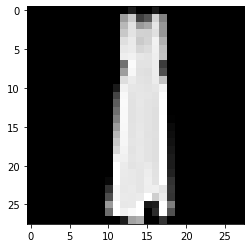

In [31]:
#Exploring a random image from the dataset
# selecting any random index from 1 to 60,000
i = random.randint(1,60000) 

#reshaping and plotting the image (color)
#plt.imshow= plot.image show
#index starts from 1 to avoid including the label values in the plot
plt.imshow( training[i,1:].reshape((28,28))) 

#reshaping and plotting the image (grayscale)
plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') 


#to view the label of the particular image
label = training[i,0]
label

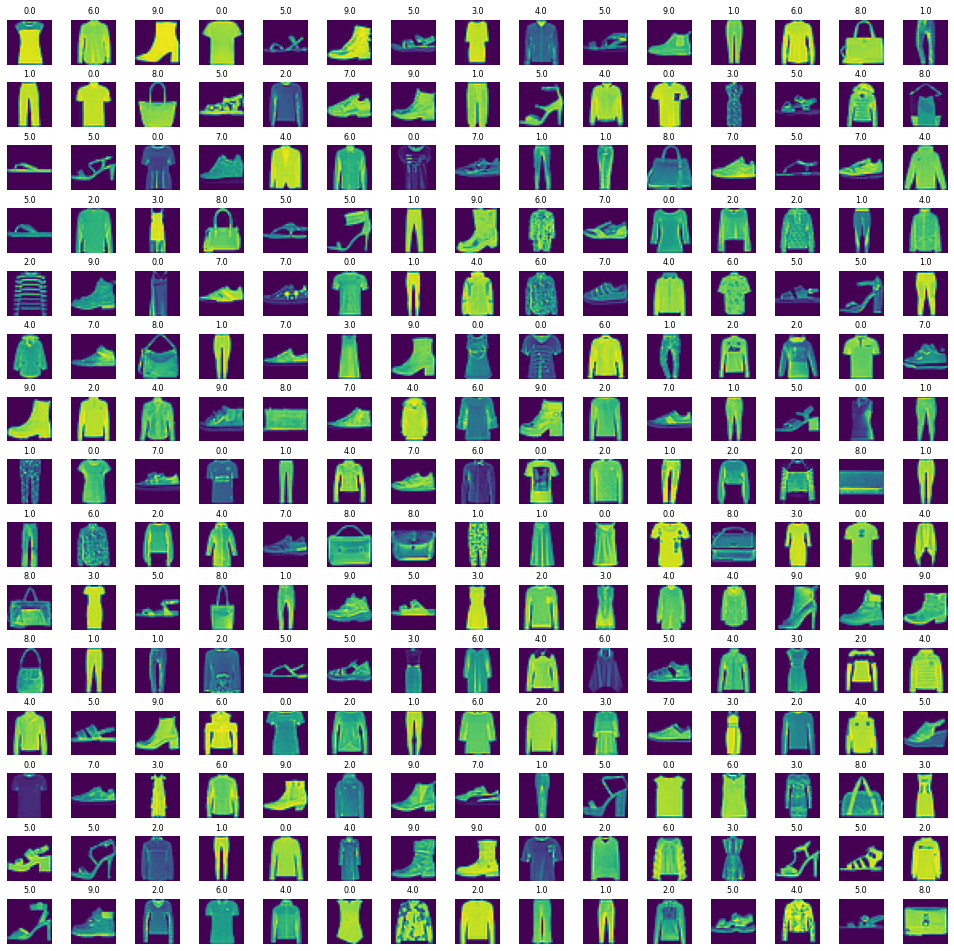

In [33]:
#viewing the images in the form of a grid
#specifying the size of the grid
W_grid = 15
L_grid = 15


fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

#flatenning the 15 x 15 matrix into 225 array
axes = axes.ravel() 

#getting the length of the training dataset
n_training = len(training) 

#Selecting a random number from 0 to n_training
#creating evenly spaces variables 
for i in np.arange(0, W_grid * L_grid): 

    #Selecting a random number
    index = np.random.randint(0, n_training)
    #reading and displaying an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

## STEP 4): Model Training

In [28]:
# Preparing the training and testing dataset 

#dividing by 255 to normalize the data
X_train=training[:,1:]/255
y_train=training[:,0]

#creating the test dataset
X_test=testing[:,1:]/255
y_test=testing[:,0]

In [29]:
#creating a validation dataset
#specifying a random state so that the results remain consistent
from sklearn.model_selection import train_test_split
X_train,X_validate,y_train, y_validate=train_test_split(X_train, y_train, test_size=0.2, random_state=12345)


In [ ]:
#reshaping the data to feed in the CNN
X_train=X_train.reshape(X_train.shape[0],*(28,28,1))
X_test=X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate=X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [30]:
X_train.shape

(48000, 28, 28, 1)

In [31]:
X_test.shape

(10000, 28, 28, 1)

In [32]:
X_validate.shape

(12000, 28, 28, 1)

In [45]:
#importing necessary packages for CNN
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [55]:
cnn_model=Sequential()

#(32,3,3) is 32 kernels and each of size (3,3)
cnn_model.add(Conv2D(32,3,3, input_shape=(28,28,1),activation = 'relu'))

#Convolution
cnn_model.add(MaxPooling2D(pool_size= (2,2)))

#Flatten
cnn_model.add(Flatten())

#hidden layer before the output (output dimension is 32)
cnn_model.add(Dense(32, activation = 'relu'))

#output layer (10 is the output dimension)
cnn_model.add(Dense(10, activation = 'sigmoid'))

In [56]:
#compiling the model
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer =Adam(lr=0.001), metrics=['accuracy'])

In [57]:
#specifying how many epochs (number of times the training dataset is presented to update the weigts)
epochs=50

In [63]:
cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        epochs=50,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 3s 27ms/step - loss: 1.9122 - accuracy: 0.3628 - val_loss: 0.8073 - val_accuracy: 0.7228
Epoch 2/50
94/94 [==============================] - 2s 24ms/step - loss: 0.7554 - accuracy: 0.7332 - val_loss: 0.6441 - val_accuracy: 0.7657
Epoch 3/50
94/94 [==============================] - 2s 25ms/step - loss: 0.6383 - accuracy: 0.7696 - val_loss: 0.5838 - val_accuracy: 0.7850
Epoch 4/50
94/94 [==============================] - 2s 24ms/step - loss: 0.5766 - accuracy: 0.7882 - val_loss: 0.5472 - val_accuracy: 0.8023
Epoch 5/50
94/94 [==============================] - 2s 24ms/step - loss: 0.5383 - accuracy: 0.8058 - val_loss: 0.5223 - val_accuracy: 0.8124
Epoch 6/50
94/94 [==============================] - 2s 24ms/step - loss: 0.5190 - accuracy: 0.8115 - val_loss: 0.5023 - val_accuracy: 0.8178
Epoch 7/50
94/94 [==============================] - 2s 24ms/step - loss: 0.4954 - accuracy: 0.8224 - val_loss: 0.4867 - val_accuracy: 0.8240
Epoch 8/50
94

## STEP 5): Model evaluation

In [65]:
#the accuracy on the test set is around 86.5%
evaluation=cnn_model.evaluate(X_test, y_test)
print('Test accuracy: {:3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3652 - accuracy: 0.8650
Test accuracy: 0.865000


In [66]:
#running the model to predict the class labels
predicted_class=cnn_model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


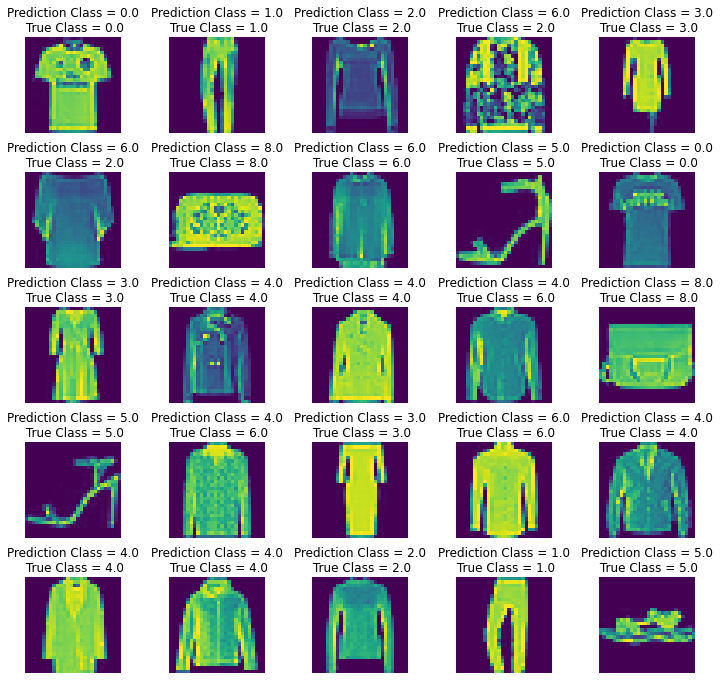

In [69]:
#creating a 5*5 grid
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))

#to flatten the axes array
axes = axes.ravel() 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_class[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

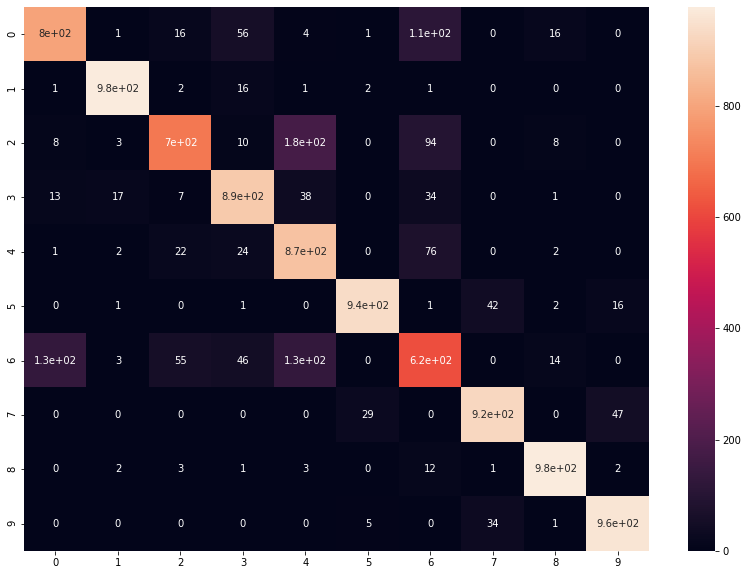

In [70]:
#confusion matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predicted_class)

#plotting the confusion matrix
plt.figure(figsize=(14,10))
sns.heatmap(cm,annot=True)

In [72]:
#classification report
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_class, target_names = target_names))

#For class 6 (shirt), the classification was poor.

              precision    recall  f1-score   support

     Class 0       0.84      0.80      0.82      1000
     Class 1       0.97      0.98      0.97      1000
     Class 2       0.87      0.70      0.78      1000
     Class 3       0.85      0.89      0.87      1000
     Class 4       0.71      0.87      0.78      1000
     Class 5       0.96      0.94      0.95      1000
     Class 6       0.65      0.62      0.63      1000
     Class 7       0.92      0.92      0.92      1000
     Class 8       0.96      0.98      0.97      1000
     Class 9       0.94      0.96      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



## Steps to improve the model

## 6) Conclusion

In this notebook, a dataset containing 70,000 records was divided into training, testing and validation and a Convoluted Neural Network was fit on the model.

The convolution layer had 32 kernels and each kernel was a 3*3 matrix without dropout.

The training accuracy was around 87% and the test accuracy was around 86%.

For the class 6, i.e. shirts, the classification was done poorly compared to other classes.

### **Steps to improve the model**

For model improvement, the number of kernels can be increased from 32 to 64.

Dropout feature can be used to drop some neurons (regularization) so that the model can generalize data better because the neurons can develop co-depedency amongst each other during training.



